In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format


# Un primer analisis del df Clicks

In [2]:
clicks = pd.read_csv('clicks.csv',low_memory=False)# dtype = {'advertiser_id' : np.int8, 'action_id' : np.float16, 'source_id' : np.int8, 'created': str})
clicks.describe()

,advertiser_id,action_id,source_id,country_code,latitude,longitude,carrier_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
count,"26,351.00",0.00,"26,351.00","26,351.00","26,351.00","26,351.00","26,340.00","26,339.00","3,243.00","26,339.00","26,351.00","6,235.00","22,977.00","23,011.00","23,011.00","26,351.00","26,351.00"
mean,2.99,nan,1.25,"6,333,597,102,633,179,136.00",1.21,1.07,7.74,"4,635,374,575,985,132,544.00","4,171,028,491,311,782,912.00","3,913,451,148,456,457,728.00","1,299,054,512,171,520,000.00",1.48,230.40,0.64,1.48,"1,888,100,205,004,328,192.00","4,611,580,963,364,695,552.00"
std,0.16,nan,2.19,"208,899.96",0.00,0.00,7.02,"1,642,969,071,347,074,304.00","2,460,496,331,949,355,520.00","1,885,865,608,589,602,304.00","1,149,672,410,494,738,688.00",1.58,976.85,0.30,2.62,"172,125,233,078,469,472.00","2,673,174,670,337,705,472.00"
min,0.00,nan,0.00,"6,333,597,102,633,388,032.00",1.21,1.06,0.00,"666,662,581,457,410,816.00","45,136,183,396,133,872.00","743,648,083,229,004,800.00","392,184,377,613,097,984.00",0.00,0.02,0.00,0.00,"1,494,519,392,962,156,800.00","928,619,179,373,370.00"
25%,3.00,nan,0.00,"6,333,597,102,633,388,032.00",1.21,1.07,3.00,"3,378,639,948,496,604,672.00","1,975,182,886,055,770,368.00","1,774,085,102,589,090,048.00","392,184,377,613,097,984.00",0.00,2.92,0.43,0.18,"1,891,515,180,541,284,352.00","2,273,798,380,684,567,552.00"
50%,3.00,nan,0.00,"6,333,597,102,633,388,032.00",1.21,1.07,6.00,"3,511,537,816,949,900,288.00","3,516,811,792,181,616,128.00","3,072,849,339,937,028,096.00","392,184,377,613,097,984.00",1.00,10.59,0.73,0.65,"1,891,515,180,541,284,352.00","4,623,720,809,049,035,776.00"
75%,3.00,nan,1.00,"6,333,597,102,633,388,032.00",1.21,1.07,13.00,"6,391,567,095,202,500,608.00","6,589,621,704,049,354,752.00","4,566,453,911,975,694,336.00","2,733,035,977,666,442,752.00",2.00,71.70,0.90,0.99,"1,891,515,180,541,284,352.00","6,917,850,278,446,808,064.00"
max,8.00,nan,10.00,"6,333,597,102,633,388,032.00",1.24,1.09,116.00,"9,081,081,953,394,761,728.00","9,221,733,410,395,374,592.00","7,499,731,952,750,279,680.00","8,930,605,132,947,906,560.00",13.00,"17,616.19",1.00,16.60,"6,323,871,695,571,587,072.00","9,221,118,223,027,605,504.00"


# Analisis respecto de touchX y touchY

In [4]:
clicks['touchXCategorico'] = pd.cut(clicks['touchX'], bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], include_lowest=True,labels=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
clicks['touchYCategorico'] = pd.cut(clicks['touchY'], bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16.60], include_lowest=True,labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

In [8]:
clicks['actividad'] = 1
for_heatmap = clicks.pivot_table(columns='touchXCategorico', index='touchYCategorico', values='actividad', aggfunc='sum')

Text(50.7222,0.5,'ToucjY')

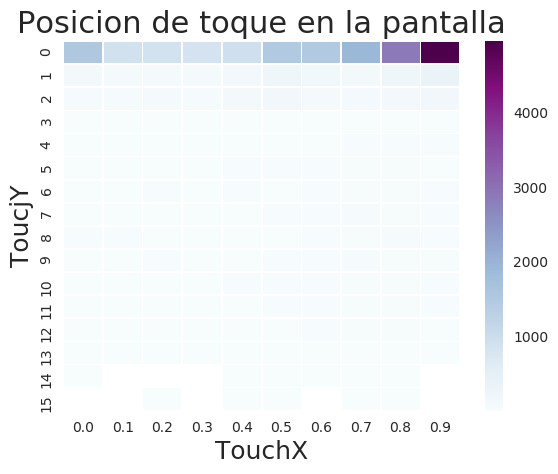

In [9]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="BuPu") # annot=True
g.set_title("Posicion de toque en la pantalla", fontsize=22)
g.set_xlabel("TouchX",fontsize=18)
g.set_ylabel("ToucjY", fontsize=18)

Parece que todos le dan a sacar publicidad. Hay que ver donde hacen click los usuarios que instalan el producto.